In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

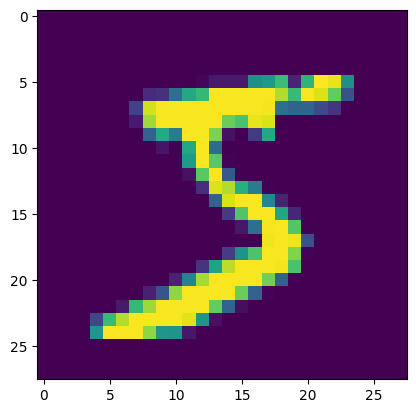

In [11]:
plt.imshow(X_train[0])

In [12]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### Scaling

In [21]:
X_train = X_train/255
X_test = X_test/255

### Flatening the data
    - Number of rows = number of X_train - length of x_train
    - Number of columns = 28*28


In [22]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [23]:
X_train_flatten.shape

(60000, 784)

In [24]:
X_test_flatten.shape

(10000, 784)

In [25]:
model = tf.keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4715 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3040 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2831 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9253


In [27]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.9263


[0.2667872905731201, 0.9262999892234802]

In [32]:
X_test_flatten.shape

(10000, 784)

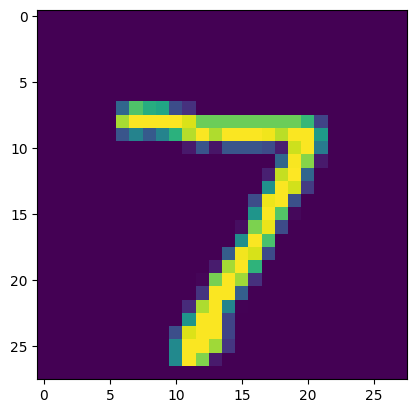

In [33]:
plt.imshow(X_test[0])

In [29]:
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 0s 949us/step


In [30]:
y_predicted[0]

array([2.7081788e-02, 4.3618380e-07, 8.6835824e-02, 9.7113037e-01,
       3.0619667e-03, 1.5933844e-01, 1.2078159e-06, 9.9985677e-01,
       1.0741597e-01, 7.1101302e-01], dtype=float32)

In [34]:
np.argmax(y_predicted[0])

7

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

## Confusion matrix

In [40]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [36]:
y_predicted

array([[2.7081788e-02, 4.3618380e-07, 8.6835824e-02, ..., 9.9985677e-01,
        1.0741597e-01, 7.1101302e-01],
       [2.6996255e-01, 5.7147662e-03, 9.9898499e-01, ..., 5.5522324e-13,
        1.4394301e-01, 2.3381070e-09],
       [3.7082663e-04, 9.9270123e-01, 6.2085921e-01, ..., 9.8924354e-02,
        3.5746011e-01, 4.3986656e-02],
       ...,
       [3.1936722e-06, 5.8025894e-06, 1.0092661e-03, ..., 1.7701906e-01,
        5.6140333e-01, 7.7936161e-01],
       [1.2317252e-04, 2.0762341e-04, 1.2494803e-04, ..., 2.7069431e-05,
        5.6651527e-01, 1.2519192e-04],
       [3.3482776e-03, 6.1172234e-10, 1.2594515e-01, ..., 9.6128145e-09,
        2.1774239e-04, 5.4209136e-07]], dtype=float32)

In [51]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    5,    9,    2,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,    9,  923,   22,    8,    5,   11,   10,   37,    4],
       [   0,    0,   13,  940,    0,   21,    2,   10,   16,    8],
       [   2,    2,    3,    1,  920,    0,   10,    3,    7,   34],
       [   7,    3,    4,   42,    9,  777,   12,    5,   27,    6],
       [   9,    3,    8,    1,    8,   14,  910,    2,    3,    0],
       [   1,    7,   22,    9,    9,    0,    0,  943,    1,   36],
       [   4,   10,    8,   34,    9,   28,    8,   10,  853,   10],
       [   9,    7,    2,   12,   30,    7,    0,   17,    4,  921]])>

Text(158.22222222222223, 0.5, 'Truth')

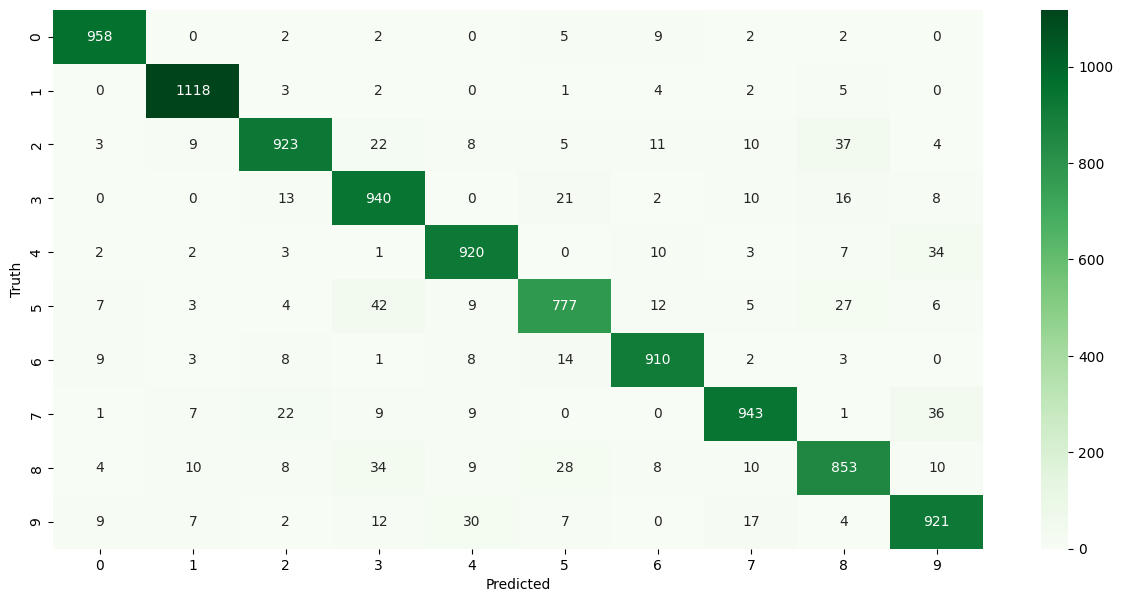

In [53]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(data=cm, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Adding Hidden layer

In [43]:
model = tf.keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2713 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1222 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0662 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0524 - accuracy: 0.9838


In [44]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0847 - accuracy: 0.9742


[0.08473356068134308, 0.9742000102996826]

313/313 [==============================] - 0s 1ms/step


Text(158.22222222222223, 0.5, 'Truth')

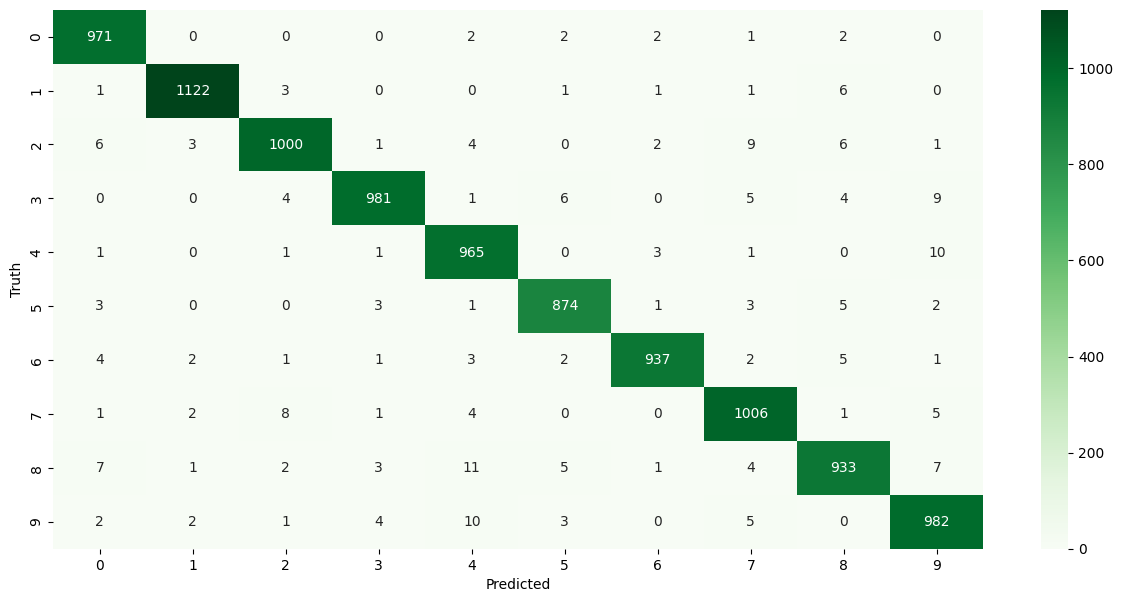

In [59]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(data=cm, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Adding Flatten layer

In [47]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2794 - accuracy: 0.9206
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1245 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0879 - accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0528 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0436 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0348 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0296 - accuracy: 0.9907
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0239 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

313/313 [==============================] - 0s 1ms/step


Text(158.22222222222223, 0.5, 'Truth')

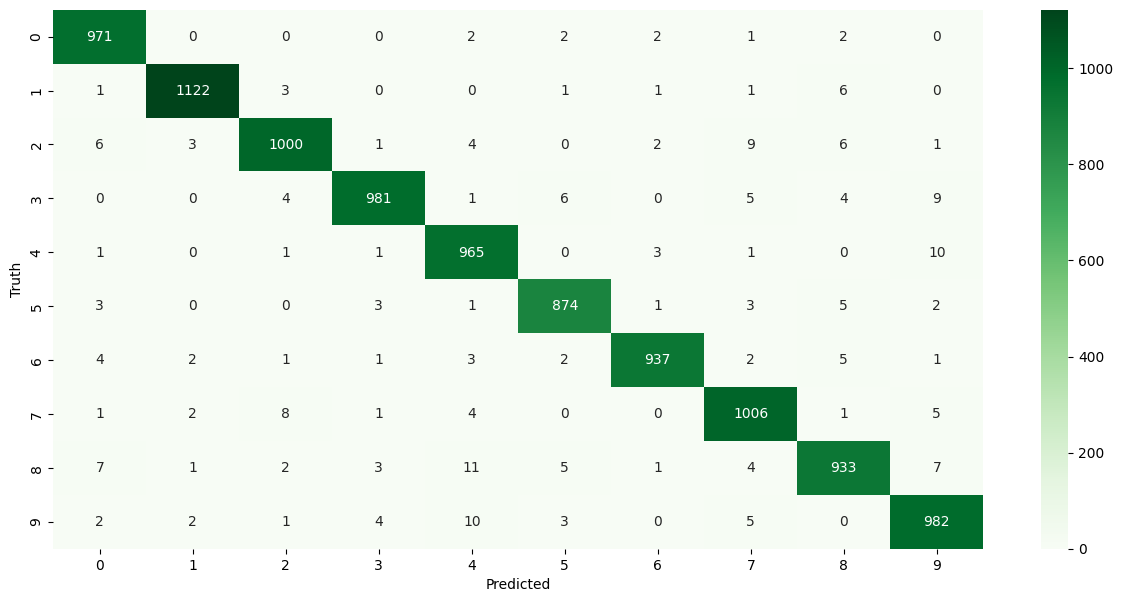

In [60]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(data=cm, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')